<a href="https://colab.research.google.com/github/voidnire/Trabalho2-Sistemas-Operacionais/blob/main/q1/Produto_Escalar_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import re
import pandas as pd
from io import StringIO

### Dados Brutos

In [37]:
dados_raw="""
CSV_DATA;computador: linux_erin; tam_vetor: 500; n_threads: 1; n_cpus: 6; resultado: 129.938225791454; tp: 0.0; ts: 0.000003;

CSV_DATA;computador: linux_erin; tam_vetor: 500; n_threads: 4; n_cpus: 6; resultado: 116.505278258509; tp: 0.000310; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 500; n_threads: 8; n_cpus: 6; resultado: 116.505278258509; tp: 0.000817; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 500; n_threads: 16; n_cpus: 6; resultado: 116.505278258509; tp: 0.001108; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 500; n_threads: 32; n_cpus: 6; resultado: 116.505278258509; tp: 0.002157; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 1000; n_threads: 1; n_cpus: 6; resultado: 257.718984057206; tp: 0.0; ts: 0.000013;

CSV_DATA;computador: linux_erin; tam_vetor: 1000; n_threads: 4; n_cpus: 6; resultado: 242.874257881719; tp: 0.001562; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 1000; n_threads: 8; n_cpus: 6; resultado: 242.874257881719; tp: 0.003074; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 1000; n_threads: 16; n_cpus: 6; resultado: 242.874257881719; tp: 0.002543; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 1000; n_threads: 32; n_cpus: 6; resultado: 242.874257881719; tp: 0.004061; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 5000; n_threads: 1; n_cpus: 6; resultado: 1211.657777716478; tp: 0.0; ts: 0.000018;

CSV_DATA;computador: linux_erin; tam_vetor: 5000; n_threads: 4; n_cpus: 6; resultado: 1273.259985628882; tp: 0.000881; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 5000; n_threads: 8; n_cpus: 6; resultado: 1273.259985628883; tp: 0.001491; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 5000; n_threads: 16; n_cpus: 6; resultado: 1273.259985628882; tp: 0.003046; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 5000; n_threads: 32; n_cpus: 6; resultado: 1273.259985628882; tp: 0.006185; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 10000; n_threads: 1; n_cpus: 6; resultado: 2495.883700719214; tp: 0.0; ts: 0.000034;

CSV_DATA;computador: linux_erin; tam_vetor: 10000; n_threads: 4; n_cpus: 6; resultado: 2515.600852961335; tp: 0.001130; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 10000; n_threads: 8; n_cpus: 6; resultado: 2515.600852961332; tp: 0.002055; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 10000; n_threads: 16; n_cpus: 6; resultado: 2515.600852961332; tp: 0.004509; ts: 0.0;

CSV_DATA;computador: linux_erin; tam_vetor: 10000; n_threads: 32; n_cpus: 6; resultado: 2515.600852961333; tp: 0.007665; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 500; n_threads: 1; n_cpus: 2; resultado: 128.764078060853; tp: 0.0; ts: 0.000002;

CSV_DATA;computador: gitspace_erin; tam_vetor: 500; n_threads: 4; n_cpus: 2; resultado: 116.505278258509; tp: 0.000188; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 500; n_threads: 8; n_cpus: 2; resultado: 116.505278258509; tp: 0.000345; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 500; n_threads: 16; n_cpus: 2; resultado: 116.505278258509; tp: 0.000783; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 500; n_threads: 32; n_cpus: 2; resultado: 116.505278258509; tp: 0.001486; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 1000; n_threads: 1; n_cpus: 2; resultado: 253.772308958720; tp: 0.0; ts: 0.000003;

CSV_DATA;computador: gitspace_erin; tam_vetor: 1000; n_threads: 4; n_cpus: 2; resultado: 242.874257881719; tp: 0.000181; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 1000; n_threads: 8; n_cpus: 2; resultado: 242.874257881719; tp: 0.000363; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 1000; n_threads: 16; n_cpus: 2; resultado: 242.874257881719; tp: 0.000802; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 1000; n_threads: 32; n_cpus: 2; resultado: 242.874257881719; tp: 0.001481; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 5000; n_threads: 1; n_cpus: 2; resultado: 1253.875588498400; tp: 0.0; ts: 0.000009;

CSV_DATA;computador: gitspace_erin; tam_vetor: 5000; n_threads: 4; n_cpus: 2; resultado: 1273.259985628882; tp: 0.000190; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 5000; n_threads: 8; n_cpus: 2; resultado: 1273.259985628883; tp: 0.000332; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 5000; n_threads: 16; n_cpus: 2; resultado: 1273.259985628882; tp: 0.000778; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 5000; n_threads: 32; n_cpus: 2; resultado: 1273.259985628882; tp: 0.001527; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 10000; n_threads: 1; n_cpus: 2; resultado: 2462.905357007955; tp: 0.0; ts: 0.000013;

CSV_DATA;computador: gitspace_erin; tam_vetor: 10000; n_threads: 4; n_cpus: 2; resultado: 2515.600852961335; tp: 0.000195; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 10000; n_threads: 8; n_cpus: 2; resultado: 2515.600852961332; tp: 0.000383; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 10000; n_threads: 16; n_cpus: 2; resultado: 2515.600852961332; tp: 0.000741; ts: 0.0;

CSV_DATA;computador: gitspace_erin; tam_vetor: 10000; n_threads: 32; n_cpus: 2; resultado: 2515.600852961333; tp: 0.001466; ts: 0.0;
"""

## Geração do Dataset

In [38]:
# Parsing
parsed_data = []
for line in dados_raw.strip().split('\n'):
    if not line.strip() or 'CSV_DATA' not in line:
        continue

    # Remove o marcador inicial e divide por ponto e vírgula
    parts = line.replace('CSV_DATA;', '').split(';')

    row = {}
    for part in parts:
        if ':' in part:
            key, value = part.split(':')
            row[key.strip()] = value.strip()
    parsed_data.append(row)

In [39]:
df = pd.DataFrame(parsed_data)
df

,computador,tam_vetor,n_threads,n_cpus,resultado,tp,ts
0,linux_erin,500,1,6,129.938225791454,0.0,0.000003
1,linux_erin,500,4,6,116.505278258509,0.000310,0.0
2,linux_erin,500,8,6,116.505278258509,0.000817,0.0
3,linux_erin,500,16,6,116.505278258509,0.001108,0.0
4,linux_erin,500,32,6,116.505278258509,0.002157,0.0
5,linux_erin,1000,1,6,257.718984057206,0.0,0.000013
6,linux_erin,1000,4,6,242.874257881719,0.001562,0.0
7,linux_erin,1000,8,6,242.874257881719,0.003074,0.0
8,linux_erin,1000,16,6,242.874257881719,0.002543,0.0
9,linux_erin,1000,32,6,242.874257881719,0.004061,0.0


In [40]:
cols_int = ['tam_vetor', 'n_threads', 'n_cpus']
cols_float = ['resultado', 'tp', 'ts']

In [41]:
for col in cols_int:
    df[col] = df[col].astype(int)

for col in cols_float:
    df[col] = df[col].astype(float)

In [42]:
# Associar o tempo sequencial (Ts) às linhas paralelas
# extrair apenas as linhas sequenciais (n_threads == 1)
df_seq = df[df['n_threads'] == 1][['computador', 'tam_vetor', 'ts']].copy()
df_seq.rename(columns={'ts': 'ts_ref'}, inplace=True)
df_seq

,computador,tam_vetor,ts_ref
0,linux_erin,500,0.000003
5,linux_erin,1000,0.000013
10,linux_erin,5000,0.000018
15,linux_erin,10000,0.000034
20,gitspace_erin,500,0.000002
25,gitspace_erin,1000,0.000003
30,gitspace_erin,5000,0.000009
35,gitspace_erin,10000,0.000013


In [43]:
#  MERGE com o dataframe original
df_final = pd.merge(df, df_seq, on=['computador', 'tam_vetor'], how='left')


In [44]:
df_final['tempo_execucao'] = df_final.apply(
    lambda row: row['ts'] if row['n_threads'] == 1 else row['tp'], axis=1
)
df_final.head()

,computador,tam_vetor,n_threads,n_cpus,resultado,tp,ts,ts_ref,tempo_execucao
0,linux_erin,500,1,6,129.938226,0.000000,0.000003,0.000003,0.000003
1,linux_erin,500,4,6,116.505278,0.000310,0.000000,0.000003,0.000310
2,linux_erin,500,8,6,116.505278,0.000817,0.000000,0.000003,0.000817
3,linux_erin,500,16,6,116.505278,0.001108,0.000000,0.000003,0.001108
4,linux_erin,500,32,6,116.505278,0.002157,0.000000,0.000003,0.002157


In [45]:
# Aceleração (Speedup) = Ts / Tp
# Para a linha sequencial, será Ts/Ts = 1
df_final['aceleracao'] = df_final['ts_ref'] / df_final['tempo_execucao']
df_final.head()

,computador,tam_vetor,n_threads,n_cpus,resultado,tp,ts,ts_ref,tempo_execucao,aceleracao
0,linux_erin,500,1,6,129.938226,0.000000,0.000003,0.000003,0.000003,1.000000
1,linux_erin,500,4,6,116.505278,0.000310,0.000000,0.000003,0.000310,0.009677
2,linux_erin,500,8,6,116.505278,0.000817,0.000000,0.000003,0.000817,0.003672
3,linux_erin,500,16,6,116.505278,0.001108,0.000000,0.000003,0.001108,0.002708
4,linux_erin,500,32,6,116.505278,0.002157,0.000000,0.000003,0.002157,0.001391


In [46]:
# Eficiência = Aceleração / Número de Threads
df_final['eficiencia'] = df_final['aceleracao'] / df_final['n_threads']


In [47]:
colunas_exibicao = ['computador', 'tam_vetor', 'n_threads', 'tempo_execucao', 'ts_ref', 'aceleracao', 'eficiencia']
print("--- Dataset Processado ---")
print(df_final[colunas_exibicao].to_string())

--- Dataset Processado ---
       computador  tam_vetor  n_threads  tempo_execucao    ts_ref  aceleracao  eficiencia
0      linux_erin        500          1        0.000003  0.000003    1.000000    1.000000
1      linux_erin        500          4        0.000310  0.000003    0.009677    0.002419
2      linux_erin        500          8        0.000817  0.000003    0.003672    0.000459
3      linux_erin        500         16        0.001108  0.000003    0.002708    0.000169
4      linux_erin        500         32        0.002157  0.000003    0.001391    0.000043
5      linux_erin       1000          1        0.000013  0.000013    1.000000    1.000000
6      linux_erin       1000          4        0.001562  0.000013    0.008323    0.002081
7      linux_erin       1000          8        0.003074  0.000013    0.004229    0.000529
8      linux_erin       1000         16        0.002543  0.000013    0.005112    0.000320
9      linux_erin       1000         32        0.004061  0.000013    0.00

Na linha 1, observa-se que a versão paralela foi 100x mais lenta que a sequencial. Isso se deve aos processos de criar e destruir threads (create e join), que custam tempo. Para vetores minúsculos (500, 1000), o tempo que o computador gasta gerenciando as threads é maior do que o tempo gasto fazendo a conta matemática simples. Isso gera uma Aceleração < 1, ou seja, uma **desaceleração**.

## Visualização em Gráficos

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6] # Tamanho padrão dos gráficos
df_final.head()

,computador,tam_vetor,n_threads,n_cpus,resultado,tp,ts,ts_ref,tempo_execucao,aceleracao,eficiencia
0,linux_erin,500,1,6,129.938226,0.000000,0.000003,0.000003,0.000003,1.000000,1.000000
1,linux_erin,500,4,6,116.505278,0.000310,0.000000,0.000003,0.000310,0.009677,0.002419
2,linux_erin,500,8,6,116.505278,0.000817,0.000000,0.000003,0.000817,0.003672,0.000459
3,linux_erin,500,16,6,116.505278,0.001108,0.000000,0.000003,0.001108,0.002708,0.000169
4,linux_erin,500,32,6,116.505278,0.002157,0.000000,0.000003,0.002157,0.001391,0.000043


### Tempo de Execução x Tamanho do Vetor

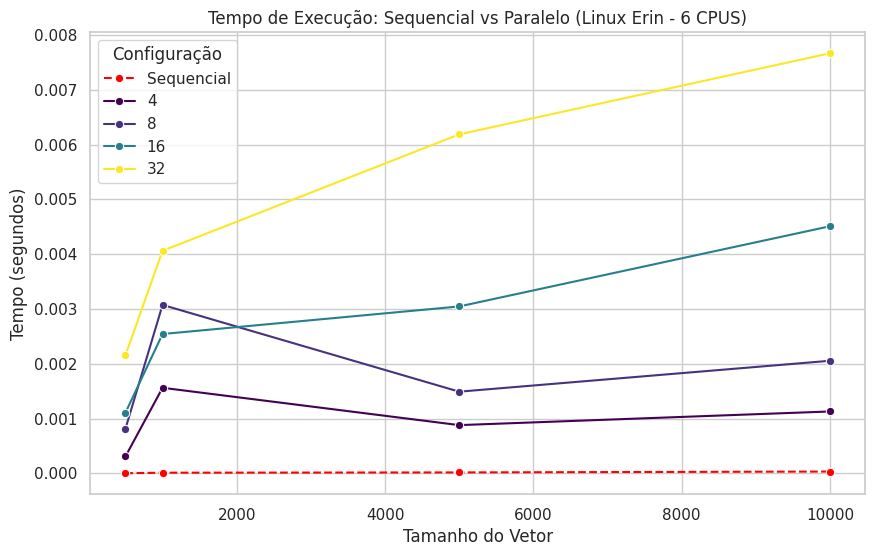

In [49]:
# DADOS DO LINUX ERIN

df_linux = df_final[df_final['computador'] == 'linux_erin']
plt.figure()

# linha Sequencial (n_threads = 1)
sns.lineplot(
    data=df_linux[df_linux['n_threads'] == 1],
    x='tam_vetor',
    y='tempo_execucao',
    label='Sequencial',
    marker='o',
    color='red',
    linestyle='--'
)


sns.lineplot(
    data=df_linux[df_linux['n_threads'] > 1],
    x='tam_vetor',
    y='tempo_execucao',
    hue='n_threads',
    marker='o',
    palette='viridis'
)

plt.title('Tempo de Execução: Sequencial vs Paralelo (Linux Erin - 6 CPUS)')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Configuração')
plt.show()

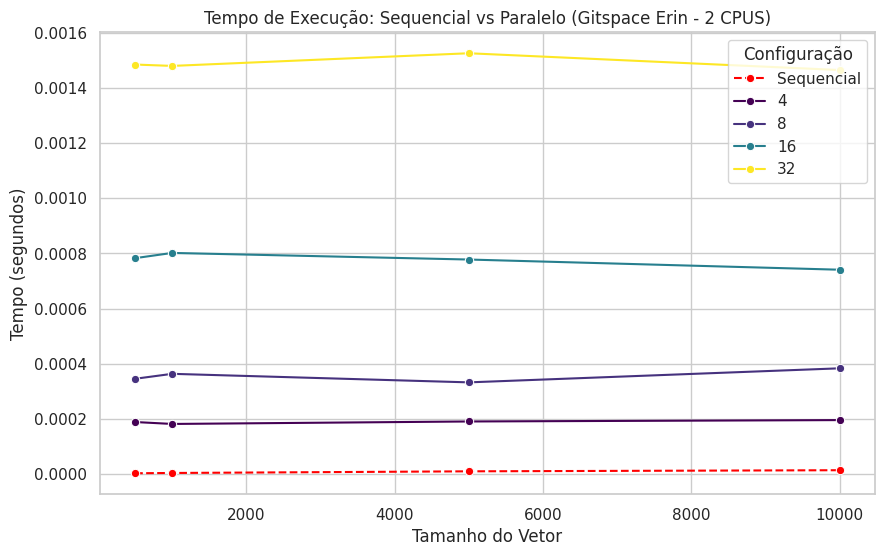

In [50]:
# DADOS DO GITSPACE ERIN
df_git = df_final[df_final['computador'] == 'gitspace_erin']
plt.figure()

# linha Sequencial (n_threads = 1)
sns.lineplot(
    data=df_git[df_git['n_threads'] == 1],
    x='tam_vetor',
    y='tempo_execucao',
    label='Sequencial',
    marker='o',
    color='red',
    linestyle='--'
)


sns.lineplot(
    data=df_git[df_git['n_threads'] > 1],
    x='tam_vetor',
    y='tempo_execucao',
    hue='n_threads',
    marker='o',
    palette='viridis'
)

plt.title('Tempo de Execução: Sequencial vs Paralelo (Gitspace Erin - 2 CPUS)')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Configuração')
plt.show()

### Aceleração (Speedup) x Número de Threads

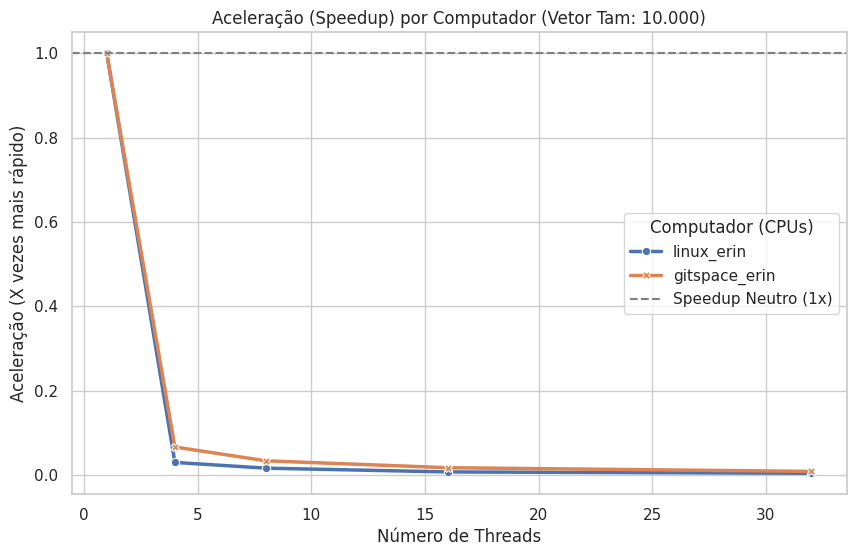

In [51]:
# apenas o maior vetor (onde o overhead impacta menos)
df_maior_vetor = df_final[df_final['tam_vetor'] == 10000]

plt.figure()

# Plotar Speedup
sns.lineplot(
    data=df_maior_vetor,
    x='n_threads',
    y='aceleracao',
    hue='computador', # Diferencia as CPUs pelas cores
    style='computador',
    markers=True,
    dashes=False,
    linewidth=2.5
)

#  linha de referência "Speedup Ideal" (Linear)
# O ideal seria y = x, mas raramente atingimos isso.
# uma linha horizontal em y=1 (ponto de neutralidade)
plt.axhline(y=1, color='gray', linestyle='--', label='Speedup Neutro (1x)')

plt.title('Aceleração (Speedup) por Computador (Vetor Tam: 10.000)')
plt.xlabel('Número de Threads')
plt.ylabel('Aceleração (X vezes mais rápido)')
plt.legend(title='Computador (CPUs)')
plt.show()

### Speedup e Eficiência

In [52]:
tabela_speedup = df_final.pivot_table(
    values='aceleracao',
    index=['computador', 'n_threads'],
    columns='tam_vetor'
)

tabela_speedup

tam_vetor                   500       1000      5000      10000
computador    n_threads                                        
gitspace_erin 1          1.000000  1.000000  1.000000  1.000000
              4          0.010638  0.016575  0.047368  0.066667
              8          0.005797  0.008264  0.027108  0.033943
              16         0.002554  0.003741  0.011568  0.017544
              32         0.001346  0.002026  0.005894  0.008868
linux_erin    1          1.000000  1.000000  1.000000  1.000000
              4          0.009677  0.008323  0.020431  0.030088
              8          0.003672  0.004229  0.012072  0.016545
              16         0.002708  0.005112  0.005909  0.007540
              32         0.001391  0.003201  0.002910  0.004436

In [53]:
tabela_eficiencia = df_final.pivot_table(
    values='eficiencia',
    index=['computador', 'n_threads'],
    columns='tam_vetor'
)
# eficiência perto de 1.0 é excelente. Perto de 0.1 é ruim.
tabela_eficiencia

tam_vetor                   500       1000      5000      10000
computador    n_threads                                        
gitspace_erin 1          1.000000  1.000000  1.000000  1.000000
              4          0.002660  0.004144  0.011842  0.016667
              8          0.000725  0.001033  0.003389  0.004243
              16         0.000160  0.000234  0.000723  0.001096
              32         0.000042  0.000063  0.000184  0.000277
linux_erin    1          1.000000  1.000000  1.000000  1.000000
              4          0.002419  0.002081  0.005108  0.007522
              8          0.000459  0.000529  0.001509  0.002068
              16         0.000169  0.000320  0.000369  0.000471
              32         0.000043  0.000100  0.000091  0.000139